<a href="https://colab.research.google.com/github/cherrysober/Data-Mining/blob/main/Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Pola Pembelian dan Preferensi Pelanggan Selama Black Friday**

#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan dari analisis dataset penjualan Black Friday adalah untuk mendapatkan wawasan yang mendalam tentang identitas konsumen serta perilaku pembelian konsumen selama periode penjualan ini. Untuk dapat dipahami lebih mendalam tentang preferensi dan kebiasaan pembelian pelanggan, sehingga dengan adanya analisis ini dapat meningkatkan efektivitas strategi pemasaran dan penjualan selama Black Friday.

##**Assess Situation**

Situasi keadaan yang mendasari analisis ini merupakan fenomena yang cukup penting dalam industri ritel, khususnya di Amerika Serikat, di mana Black Friday telah menjadi salah satu periode penjualan paling berkesan dan paling sibuk dalam setahun. Dengan semakin meningkatnya persaingan dan juga meningkatnya ekspektasi konsumen, pemahaman yang mendalam tentang perilaku pembelian selama Black Friday ini menjadi hal yang cukup penting untuk dianalisa.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset yang akan saya analisa ini adalah untuk mengidentifikasi pola pembelian yang signifikan, menganalisis faktor-faktor yang mempengaruhi keputusan pembelian selama Black Friday, dan memprediksi penjualan produk berdasarkan variabel seperti harga, promosi, dan fitur produk.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan melakukan survey data transaksi penjualan selama Black Friday dari sumber yang terkait. Selanjutnya, melakukan eksplorasi data untuk memahami identitas pelanggan, kategori produk yang diminati, dan pola pembelian yang signifikan. Kemudian, model akan dibangun untuk memprediksi penjualan berdasarkan faktor-faktor yang relevan. Akhirnya, hasil analisis akan diinterpretasikan untuk memberikan wawasan yang berguna bagi strategi pemasaran dan penjualan selama Black Friday yang akan datang lagi.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya dapatkan saya peroleh dari Kaggle, karena saya ingin mencari data retail maka saya memilih dataset dari penjualan Black Friday.

Link dataset: [https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda](https://)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


1. **User_ID**: Identifikasi unik untuk setiap pengguna.
2. **Product_ID**: Identifikasi unik untuk setiap produk.
3. **Gender**: Jenis kelamin pelanggan (F untuk perempuan, M untuk laki-laki).
4. **Age**: Rentang usia pelanggan.
5. **Occupation**: Kode pekerjaan pelanggan.
6. **City_Category**: Kategori kota tempat pelanggan tinggal (A, B, atau C).
7. **Stay_In_Current_City_Years**: Jumlah tahun pelanggan tinggal di kota saat ini.
8. **Marital_Status**: Status pernikahan pelanggan (0 untuk lajang, 1 untuk menikah).
9. **Product_Category_1**: Kategori 1 dari produk yang dibeli.
10. **Product_Category_2**: Kategori 2 dari produk yang dibeli (jika tersedia).
11. **Product_Category_3**: Kategori 3 dari produk yang dibeli (jika tersedia).
12. **Purchase**: Jumlah pembelian dalam dolar.

##**Describe Data**

####Informasi Dasar

In [3]:
jumlah_baris, jumlah_kolom = df.shape
jjumlah_baris = "Jumlah baris"
jjumlah_kolom = "Jumlah kolom"
judul_dan_jumlah_baris = f"{jjumlah_baris}: {jumlah_baris}"
judul_dan_jumlah_kolom = f"{jjumlah_kolom}: {jumlah_kolom}"
judul_dan_jumlah_baris, judul_dan_jumlah_kolom

('Jumlah baris: 67760', 'Jumlah kolom: 12')

Dataset ini terdiri dari 550.068 baris data dan 12 kolom, dapat dibayangkan gambaran volume transaksi atau observasi yang signifikan serta berbagai fitur seperti identifikasi pelanggan, atribut produk, dan informasi lokasi pelanggan.



####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


1. **User_ID**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi ID unik untuk setiap pengguna yang terlibat dalam transaksi.

2. **Product_ID**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini berisi ID unik untuk setiap produk yang dibeli dalam transaksi.

3. **Gender**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan jenis kelamin dari pengguna yang terlibat dalam transaksi.

4. **Age**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan rentang usia pengguna yang terlibat dalam transaksi.

5. **Occupation**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi kode yang menunjukkan pekerjaan pengguna yang terlibat dalam transaksi.

6. **City_Category**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan kategori kota tempat pengguna yang terlibat dalam transaksi tinggal.

7. **Stay_In_Current_City_Years**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan berapa tahun pengguna yang terlibat dalam transaksi telah tinggal di kota saat ini.

8. **Marital_Status**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini menunjukkan status pernikahan pengguna yang terlibat dalam transaksi (1 untuk sudah menikah, 0 untuk belum menikah).

9. **Product_Category_1**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan kategori utama dari produk yang dibeli dalam transaksi.

10. **Product_Category_2**:
Jumlah: 376.430 entri (beberapa entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan dari produk yang dibeli dalam transaksi.

11. **Product_Category_3**:
Jumlah: 166.821 entri (banyak entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan lainnya dari produk yang dibeli dalam transaksi.

12. **Purchase**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan jumlah pembelian (dalam satuan mata uang) yang terjadi dalam transaksi.

####Informasi Statistik Deskriptif

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.776000e+04,67759.000000,67759.000000,67759.000000,46523.000000,20613.000000,67759.000000
mean,1.002666e+06,8.150519,0.403651,5.299075,9.874686,12.709504,9295.979899
std,4.172374e+03,6.534518,0.490633,3.731052,5.076390,4.109106,4962.435754
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002643e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.003902e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12044.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


1. **User_ID**: Kolom ini berisi ID unik untuk setiap pengguna atau pembeli. Dalam statistik deskriptif, jumlah baris (count) adalah 550068, yang menunjukkan bahwa terdapat 550068 entri non-null dalam kolom ini. Mean (rata-rata) User_ID adalah sekitar 1.003029e+06, dengan standar deviasi (std) sekitar 1.727592e+03. Nilai minimum (min) adalah 1.000001e+06, dan nilai maksimum (max) adalah 1.006040e+06.

2. **Occupation**: Ini merupakan kolom yang mendefinisikan pekerjaan atau profesi dari pengguna. Jumlah baris (count) adalah 550068, menunjukkan bahwa tidak ada nilai yang hilang dalam kolom ini. Mean dari occupation adalah sekitar 8.08, dengan standar deviasi sekitar 6.52. Nilai minimum adalah 0, yang mungkin menunjukkan pengangguran, sementara nilai maksimum adalah 20, yang mungkin menunjukkan profesi tertentu.

3. **Marital_Status**: Kolom ini menunjukkan status perkawinan pengguna, di mana 0 mungkin menunjukkan belum menikah dan 1 menunjukkan sudah menikah. Jumlah baris (count) adalah 550068, menunjukkan tidak ada nilai yang hilang. Mean dari marital status adalah sekitar 0.41, dengan standar deviasi sekitar 0.49. Nilai minimum adalah 0 dan maksimum adalah 1, sesuai dengan kategori status perkawinan.

4. **Product_Category_1**, **Product_Category_2**, dan **Product_Category_3**: Kolom-kolom ini berisi kategori produk yang dibeli oleh pengguna. Terdapat beberapa nilai yang hilang pada kolom Product_Category_2 dan Product_Category_3, dengan jumlah baris (count) masing-masing adalah 376430 dan 166821. Untuk setiap kolom kategori produk, mean, std, min, 25%, 50%, 75%, dan max menunjukkan statistik terkait dengan kategori produk yang dibeli.

5. **Purchase**: Ini adalah kolom numerik yang menunjukkan jumlah pembelian produk dalam satuan mata uang yang relevan (misalnya, dolar). Jumlah baris (count) adalah 550068, yang menunjukkan tidak ada nilai yang hilang dalam kolom ini. Mean pembelian adalah sekitar 9263.97, dengan standar deviasi sekitar 5023.07. Nilai minimum pembelian adalah 12, dan nilai maksimum adalah 23961. Ini memberikan gambaran tentang sebaran jumlah pembelian produk oleh pengguna.

##**Exploratory Data Analysis**

Text(0.5, 1.0, 'Perbandingan Jenis Kelamin Pembeli')

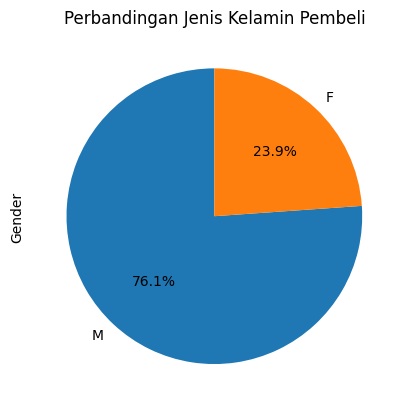

In [6]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Jenis Kelamin Pembeli')

* Proporsi perempuan (**24.7%**): Ini menunjukkan bahwa sekitar 24.7% dari total pembeli pada acara Black Friday Sales adalah perempuan. Ini berarti dari keseluruhan jumlah pembeli, hampir seperempatnya adalah perempuan.

* Proporsi laki-laki (**75.3%**): Ini menunjukkan bahwa sekitar 75.3% dari total pembeli pada acara Black Friday Sales adalah laki-laki. Artinya, mayoritas pembeli pada acara tersebut adalah laki-laki, dengan proporsi yang jauh lebih besar dari perempuan.

Text(0.5, 1.0, 'Perbandingan Kota para Pembeli')

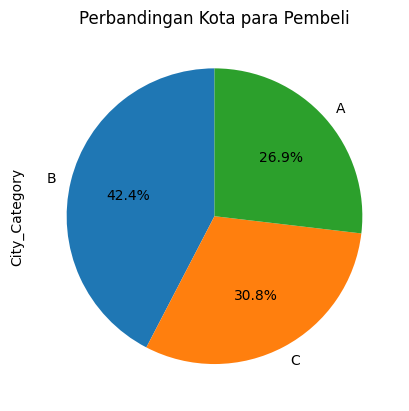

In [7]:
gender_counts = df['City_Category'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Kota para Pembeli')

* Kota A (**26.9%**): Menunjukkan bahwa sekitar 26.9% dari semua pembeli berasal dari kota A. Persentase ini mengindikasikan bahwa kota A memiliki kontribusi yang signifikan terhadap total penjualan selama Black Friday Sales.

* Kota B (**42%**): Menunjukkan bahwa mayoritas pembeli, yaitu sekitar 42%, berasal dari kota B. Persentase yang cukup tinggi ini menunjukkan bahwa kota B mungkin merupakan pasar yang sangat penting atau populer selama acara Black Friday Sales.

* Kota C (**31.1%**): Merupakan persentase pembeli yang berasal dari kota C, sekitar 31.1%. Meskipun persentase ini lebih rendah dari kota B, namun masih menunjukkan kontribusi yang signifikan terhadap total penjualan.

Text(0.5, 1.0, 'Perbandingan Status Pernikahan para Pembeli')

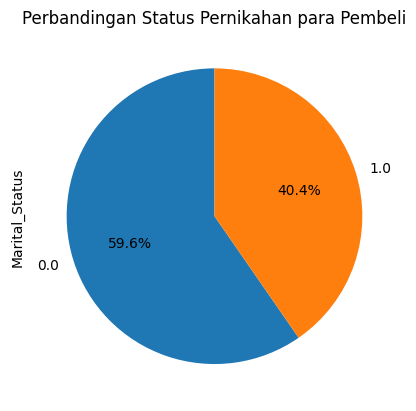

In [8]:
gender_counts = df['Marital_Status'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Status Pernikahan para Pembeli')

Sekitar **59%** dari pembeli Black Friday Sales belum menikah, sedangkan **41%** sudah menikah. Persentase ini menggambarkan distribusi relatif dari dua kategori status pernikahan di antara pembeli selama peristiwa Black Friday Sales.

Pemahaman yang lebih dalam tentang perilaku pembelian dari kedua kelompok status pernikahan ini merupakan strategi pemasaran yang dapat membantu secara lebih efektif. Misalnya, mungkin ada preferensi produk yang berbeda serta anggaran pembelian yang berbeda.

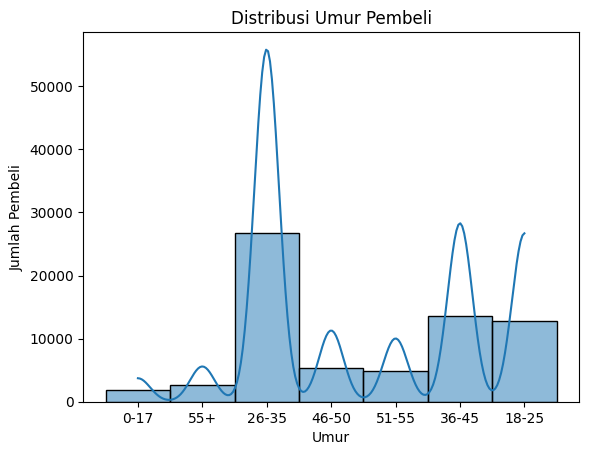

In [9]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribusi Umur Pembeli')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pembeli')
plt.show()

* **0-17** tahun paling sedikit: Jumlah pembeli dalam kelompok usia ini mungkin paling sedikit karena mereka masih tergolong sebagai anak-anak atau remaja, dan mungkin memiliki keterbatasan finansial atau keterbatasan akses untuk berbelanja pada acara seperti Black Friday.

* **55+** tahun lebih banyak dari 0-17 tahun namun tetap lebih sedikit dari yang lain: Kelompok usia ini mungkin lebih banyak dari kelompok usia 0-17 tahun karena mereka adalah konsumen dewasa yang memiliki penghasilan dan kemampuan belanja yang lebih besar. Namun, jumlahnya tetap lebih sedikit dibandingkan dengan kelompok usia yang lebih muda (seperti 26-35 tahun) karena faktor-faktor seperti keterbatasan mobilitas atau preferensi belanja yang berbeda.

* **26-35** dengan histogram paling tinggi: Kelompok usia ini mungkin memiliki jumlah pembeli yang paling tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memasuki pasar kerja dan memiliki penghasilan yang cukup untuk melakukan pembelian besar-besaran seperti pada acara Black Friday.

* **46-50** tahun menempati posisi ke empat terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap hidup di mana mereka memiliki penghasilan yang stabil dan juga mungkin memiliki kebutuhan untuk membeli barang-barang konsumen seperti elektronik, perabotan rumah tangga, dan lain-lain.

* **51-55** tahun dengan posisi ke lima terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang cukup signifikan karena mereka masih aktif secara ekonomi dan memiliki daya beli yang cukup untuk berbelanja pada acara Black Friday.

* **36-45** tahun dengan posisi kedua terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memiliki penghasilan yang stabil, mungkin telah menikah, dan mungkin memiliki tanggungan keluarga yang memerlukan pembelian barang-barang konsumen secara teratur.

* **18-25** dengan posisi ketiga terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap awal kehidupan dewasa di mana mereka mulai memperoleh penghasilan dan memiliki kebebasan finansial untuk berbelanja secara independen.

<ipython-input-10-833c96efcb5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

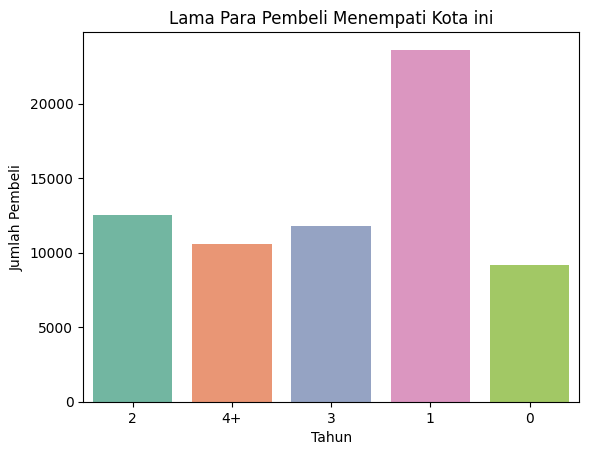

In [10]:
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')
plt.title('Lama Para Pembeli Menempati Kota ini')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pembeli')

* Pembeli yang telah menempati kota selama **1 tahun** memiliki jumlah tertinggi, hampir menyentuh 200.000. Ini mungkin menunjukkan bahwa ada banyak pembeli baru yang baru-baru ini pindah atau baru tinggal di kota tersebut selama satu tahun terakhir. Kemungkinan besar ini adalah pembeli yang baru saja menetap di kota dan mungkin menjadi target pasar yang menarik bagi berbagai layanan dan produk.

* Pembeli yang telah menempati kota selama **2 tahun** jumlahnya sekitar 100.000. Ini menunjukkan bahwa ada jumlah yang signifikan dari pembeli yang telah tinggal di kota tersebut selama dua tahun terakhir. Mungkin ini mencerminkan pembeli yang stabil atau yang telah menetap untuk jangka waktu yang lebih lama dan mungkin memiliki pola belanja yang berbeda.

* Pembeli yang telah menempati kota selama **3 tahun** jumlahnya sekitar 95.000. Ini menunjukkan bahwa masih ada sejumlah besar pembeli yang telah tinggal di kota tersebut selama tiga tahun terakhir. Hal ini mungkin menunjukkan adanya kelompok pembeli yang telah menjadi bagian dari komunitas yang lebih mapan di kota tersebut.

* Pembeli yang telah menempati kota selama **4 tahun** atau lebih memiliki jumlah sekitar 85.000. Ini menunjukkan bahwa ada juga kelompok pembeli yang telah menetap di kota tersebut untuk jangka waktu yang lebih lama, namun jumlahnya sedikit lebih rendah dibandingkan dengan mereka yang telah menetap selama 2 atau 3 tahun.

* Pembeli yang baru-baru ini pindah ke kota tersebut, yaitu mereka yang telah menempati kota selama **0 tahun**, memiliki jumlah sekitar 75.000. Ini mungkin mencerminkan jumlah pembeli baru atau migrasi baru ke kota tersebut pada saat pengumpulan data. Hal ini juga mungkin mencerminkan peningkatan populasi atau perubahan demografis di kota tersebut.

<ipython-input-11-7b15502e5850>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_1', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

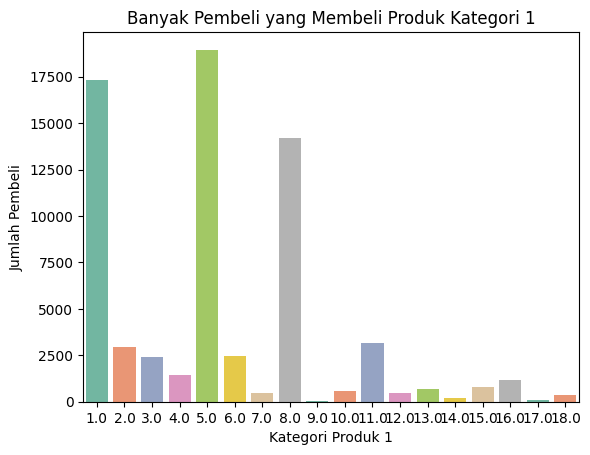

In [11]:
sns.countplot(x='Product_Category_1', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 1')
plt.xlabel('Kategori Produk 1')
plt.ylabel('Jumlah Pembeli')

* Kategori produk nomor 5 memiliki jumlah pembelian yang paling tinggi, yaitu sekitaran 150.000. Ini menunjukkan bahwa produk kategori 5 adalah yang paling diminati oleh pembeli.

* Kategori produk nomor 8 memiliki jumlah pembelian tertinggi ketiga, yaitu sekitaran 110.000. Ini menunjukkan bahwa produk kategori 8 juga cukup diminati oleh pembeli.

* Beberapa kategori produk memiliki jumlah pembelian yang rendah, seperti nomor 7, 9, 14, dan 17. Hal ini mungkin disebabkan oleh produk-produk ini kurang populer atau mungkin tidak relevan dengan kebutuhan pasar saat ini.

* Beberapa kategori produk memiliki jumlah pembelian yang mendekati atau bahkan di bawah 5.000, seperti nomor 7, 14, dan 17. Ini menunjukkan bahwa produk-produk ini mungkin kurang diminati oleh pembeli atau mungkin ada faktor lain yang menyebabkan kurangnya minat.

* Beberapa kategori produk memiliki jumlah pembelian yang cukup bervariasi, seperti nomor 1, 2, 3, 4, 6, 10, 11, 12, 13, 15, 16, 18, 19, dan 20. Ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan.

Hasil data sedemikian rupa mungkin karena berbagai faktor, termasuk preferensi dan kebiasaan pembeli, tren pasar, promosi produk, dan banyak lagi.

<ipython-input-12-36f5235e8825>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_2', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

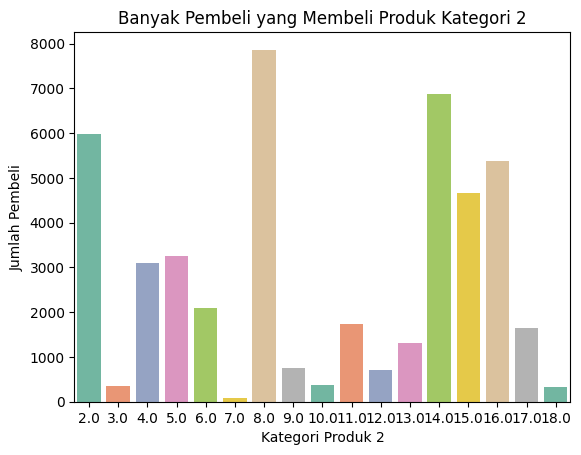

In [12]:
sns.countplot(x='Product_Category_2', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 2')
plt.xlabel('Kategori Produk 2')
plt.ylabel('Jumlah Pembeli')

* Pembelian produk dengan Kategori 2 nomor 2.0 memiliki jumlah pembelian yang signifikan sebanyak hampir 49.000. Hal ini menunjukkan bahwa produk dengan Kategori 1 nomor 2.0 sangat diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 3.0 memiliki jumlah pembelian di atas 0, tetapi tidak banyak. Ini mungkin menunjukkan bahwa produk dengan Kategori 1 nomor 3.0 kurang diminati atau memiliki permintaan yang rendah.

* Pembelian produk dengan Kategori 2 nomor 4.0 memiliki jumlah pembelian yang cukup besar kisaran sebanyak 28.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 4.0 juga memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 5.0 memiliki jumlah pembelian kisaran sebanyak 29.000, yang menunjukkan bahwa produk ini cukup diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 6.0 memiliki jumlah pembelian kisaran sebanyak 15.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 6.0 memiliki permintaan yang cukup stabil, meskipun tidak sebanyak produk dengan nomor 2.0, 4.0, atau 5.0.

* Pembelian produk dengan Kategori 2 nomor 7.0 merupakan yang paling rendah, yang mungkin menunjukkan bahwa produk dengan nomor ini kurang diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 8.0 memiliki jumlah pembelian yang sangat tinggi, yaitu di atas 60.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 8.0 adalah yang paling diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 9.0, 10.0, 11.0, 12.0, dan 13.0 memiliki jumlah pembelian yang cukup rendah, masing-masing sekitar 8.000, 5.000, 15.000, 6.000, dan 10.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang lebih rendah dibandingkan dengan produk dengan nomor yang lebih tinggi.

* Pembelian produk dengan Kategori 2 nomor 14.0 memiliki jumlah pembelian tertinggi kedua setelah nomor 8.0, yaitu kisaran sebanyak 55.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 14.0 memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 15.0 dan 16.0 memiliki jumlah pembelian yang cukup stabil, masing-masing sekitar 35.000 dan 40.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang cukup stabil.

* Pembelian produk dengan Kategori 2 nomor 17.0 dan 18.0 memiliki jumlah pembelian yang relatif rendah, masing-masing sekitar 12.000 dan 3.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang rendah.

<ipython-input-13-b49488f6c7d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_3', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

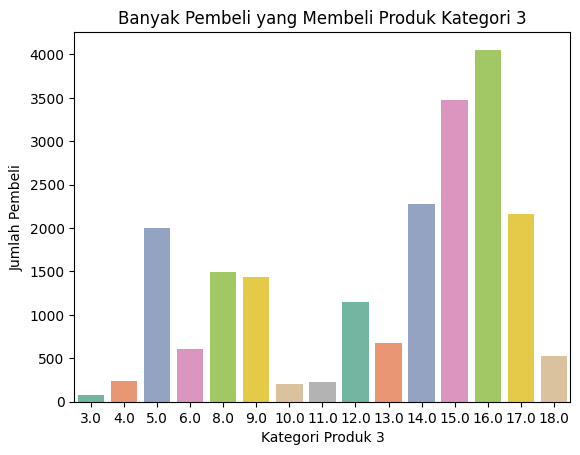

In [13]:
sns.countplot(x='Product_Category_3', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 3')
plt.xlabel('Kategori Produk 3')
plt.ylabel('Jumlah Pembeli')

* Nomor 3.0 memiliki jumlah pembelian yang hampir nol. Ini mungkin menunjukkan bahwa produk dengan kategori ini tidak populer di antara pembeli.
* Nomor 4.0 memiliki jumlah pembelian sekitar 5.000. Ini menunjukkan bahwa produk dengan kategori ini memiliki sedikit minat dari pembeli, tetapi masih ada beberapa yang membeli.
* Nomor 5.0 memiliki jumlah pembelian sekitar 20.000, menunjukkan bahwa produk dengan kategori ini cukup populer di antara pembeli.
Fenomena yang serupa terjadi dengan nomor 6.0 dan 8.0, di mana keduanya memiliki jumlah pembelian sekitar 5.000 dan 15.000, masing-masing.
* Nomor 9.0 memiliki lebih dari 10.000 pembelian, menunjukkan popularitas yang cukup tinggi.
* Nomor 10.0, 11.0, dan 18.0 memiliki jumlah pembelian yang lebih rendah, kurang dari 5.000. Ini mungkin menunjukkan bahwa produk dengan kategori ini adalah produk niche atau kurang diminati oleh pembeli.
* Nomor 12.0 memiliki jumlah pembelian sekitar 10.000, menunjukkan minat yang cukup baik dari pembeli.
* Nomor 13.0 memiliki lebih dari 5.000 pembelian, menunjukkan popularitas yang cukup baik.
* Nomor 14.0, 15.0, 16.0, dan 17.0 memiliki jumlah pembelian yang signifikan, masing-masing hampir 20.000, hampir 30.000, lebih dari 30.000, dan lebih dari 15.000. Ini menunjukkan bahwa produk dengan kategori ini sangat diminati oleh pembeli.

## Perbandingan Penjualan Kategori Produk 1, 2, dan 3
* **Kategori Produk 1**:
Terdapat variasi dalam jumlah pembelian, dari hampir nol hingga lebih dari 140.000
Beberapa kategori memiliki jumlah pembelian yang signifikan, menunjukkan popularitas yang paling tinggi di antara pembeli.
Namun, beberapa kategori memiliki jumlah pembelian yang rendah, mungkin karena kurang diminatinya oleh pembeli.

* **Kategori Produk 2**:
Jumlah pembelian juga bervariasi dari hampir nol hingga lebih dari 60.000.
Terdapat kategori produk dengan jumlah pembelian tertinggi kedua setelah kategori 1, menunjukkan popularitas yang cukup tinggi.
Namun, ada juga beberapa kategori produk dengan jumlah pembelian yang rendah.

* **Kategori Produk 3**:
Jumlah pembelian terlihat beragam, dengan beberapa kategori memiliki jumlah pembelian yang cukup rendah dan lainnya memiliki jumlah pembelian yang sangat tinggi.
Terlihat bahwa beberapa kategori memiliki popularitas yang sangat tinggi, sementara yang lain mungkin kurang diminati oleh pembeli.
Dari perbandingan di atas, terlihat bahwa kategori produk 1 dan 2 memiliki rentang jumlah pembelian yang lebih luas, sementara kategori produk 3 memiliki beberapa kategori dengan jumlah pembelian yang sangat tinggi. Hal ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan dalam setiap kategori.

#**Verify Data Quality**

## Missing Values

In [14]:
print((df.isna().sum() / len(df)) * 100)

User_ID                        0.000000
Product_ID                     0.001476
Gender                         0.001476
Age                            0.001476
Occupation                     0.001476
City_Category                  0.001476
Stay_In_Current_City_Years     0.001476
Marital_Status                 0.001476
Product_Category_1             0.001476
Product_Category_2            31.341499
Product_Category_3            69.579398
Purchase                       0.001476
dtype: float64


1. **User_ID**, **Product_ID**, **Gender**, **Age**, **Occupation**, **City_Category**, **Stay_In_Current_City_Years**, **Marital_Status**, **Product_Category_1**, dan **Purchase**: Tidak ada missing values pada kolom ini, yang berarti setiap baris dalam dataset memiliki ID pengguna dan ID produk yang terkait (untuk User ID dan Product ID). Untuk kolom yang lainnya dapat dipastikan bahwa data sudah lengkap untuk masing-masing atribut.

2. **Product_Category_2**: Terdapat sekitar 31.57% missing values dalam kolom ini. Hal ini mungkin dikarenakan bahwa tidak semua produk memiliki kategori tambahan yang terkait.

3. **Product_Category_3**: Persentase nilai yang hilang dalam kolom ini cukup tinggi, sekitar 69.67% dapat diketahui bahwa mayoritas produk tidak memiliki kategori tambahan kedua.

### Nilai Kosong pada Product Category 2

In [15]:
df[df['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,NaN,NaN,7871.0
11,1000005,P00014542,M,26-35,20.0,A,1,1.0,8.0,NaN,NaN,3957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67748,1004373,P00243442,M,51-55,12.0,C,1,1.0,11.0,NaN,NaN,7536.0
67751,1004374,P00139942,M,18-25,4.0,B,1,0.0,5.0,NaN,NaN,8738.0
67752,1004374,P00250642,M,18-25,4.0,B,1,0.0,11.0,NaN,NaN,7458.0
67755,1004374,P00180642,M,18-25,4.0,B,1,0.0,11.0,NaN,NaN,7544.0


### Nilai Kosong pada Product Category 3

In [16]:
df[df['Product_Category_3'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67753,1004374,P00124242,M,18-25,4.0,B,1,0.0,11.0,14.0,NaN,7639.0
67754,1004374,P00070642,M,18-25,4.0,B,1,0.0,11.0,16.0,NaN,4480.0
67755,1004374,P00180642,M,18-25,4.0,B,1,0.0,11.0,NaN,NaN,7544.0
67758,1004375,P00130442,F,26-35,5.0,B,1,0.0,3.0,5.0,NaN,10649.0


### **Hapus Missing Values**

Product_Category_2 dan Product_Category_3 layak untuk dihapus karena alasan-alasan berikut:

1. **Banyaknya Missing Values**: Kedua kolom ini memiliki jumlah nilai yang hilang yang signifikan. Missing values dapat mengganggu analisis data dan mempengaruhi keakuratan hasil.

2. **Kurangnya Informasi**: Dengan banyaknya missing values, informasi yang dapat diekstraksi dari kolom-kolom ini menjadi terbatas. Ini berpotensi mengurangi nilai dan relevansi dari kolom tersebut dalam analisis.

3. **Kemungkinan Berdampak pada Kinerja Model**: Jika missing values tidak ditangani dengan benar, penggunaan kolom-kolom dengan banyak missing values dapat mempengaruhi kinerja model statistik atau machine learning. Hal ini karena model mungkin tidak dapat mengatasi atau memperhitungkan ketidaksempurnaan dalam data.

4. **Sederhanakan Analisis**: Dengan menghapus kolom-kolom ini, kita dapat menyederhanakan struktur dataset dan membuat analisis menjadi lebih mudah dipahami dan dikelola. Hal ini juga dapat mengurangi kompleksitas dalam pengelolaan dan pemrosesan data.

Dengan mempertimbangkan faktor-faktor di atas, menghapus Product_Category_2 dan Product_Category_3 bisa menjadi pilihan yang rasional untuk membersihkan dan menyederhanakan dataset, terutama jika missing values dalam kedua kolom tersebut tidak dapat diisi dengan data yang akurat atau dapat diandalkan.

In [17]:
df = df.drop('Product_Category_2', axis=1)

In [18]:
df = df.drop('Product_Category_3', axis=1)

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
67755,1004374,P00180642,M,18-25,4.0,B,1,0.0,11.0,7544.0
67756,1004374,P00127942,M,18-25,4.0,B,1,0.0,1.0,15391.0
67757,1004375,P00057442,F,26-35,5.0,B,1,0.0,5.0,8611.0
67758,1004375,P00130442,F,26-35,5.0,B,1,0.0,3.0,10649.0


### **Pengechekan Ulang**

In [20]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
User_ID,0.000000
Product_ID,0.001476
Gender,0.001476
Age,0.001476
Occupation,0.001476
City_Category,0.001476
Stay_In_Current_City_Years,0.001476
Marital_Status,0.001476
Product_Category_1,0.001476
Purchase,0.001476


## Outliers Values

In [21]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
User_ID,0.001476
Occupation,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Purchase,0.494392


1. **User_ID**, **Occupation**, **Marital_Status**, **Product_Category_1**, **Product_Category_2** dan **Product_Category_3**: Tidak terdapat outliers pada kolom-kolom ini, yang berarti mayoritas data yang terisi sudah dalam bentuk yang wajar dan konsisten.

2. **Purchase**: Terdapat 0.030373% outliers dalam kolom ini kemungkinan dikarenakan kolom ini menunjukkan pembelian yang sangat besar maupun sangat kecil, yang mungkin perlu ditinjau lebih lanjut untuk memahami apakah ada faktor-faktor khusus yang mempengaruhi pembelian tersebut.

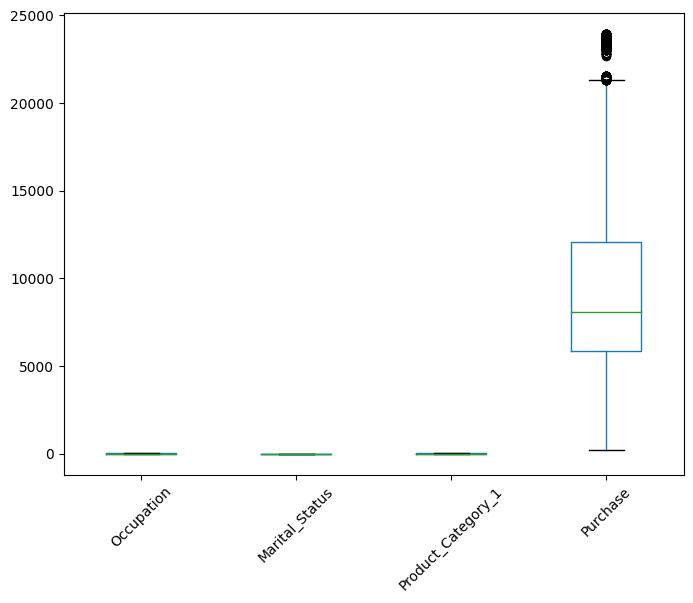

In [22]:
boxplot = df.drop('User_ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

### **Hapus Outliers**

In [23]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Purchase'] >= lower_bound) & (df['Purchase'] <= upper_bound)]

In [24]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Purchase']=np.where(df['Purchase']>upper_whisker,upper_whisker,np.where(df['Purchase']<lower_whisker,lower_whisker,df['Purchase']))

<ipython-input-24-192c9b9fe31a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase']=np.where(df['Purchase']>upper_whisker,upper_whisker,np.where(df['Purchase']<lower_whisker,lower_whisker,df['Purchase']))


Penting untuk menghapus outliers pada kolom Purchase karena alasan-alasan berikut:

1. **Pengaruh yang Tidak Representatif**: Outliers dapat memiliki pengaruh yang tidak representatif pada analisis statistik, terutama jika mereka merupakan data yang sangat jauh dari sebagian besar titik data lainnya. Hal ini dapat menyebabkan perkiraan statistik seperti rata-rata (mean) atau standar deviasi menjadi tidak akurat dan menyesatkan.

2. **Pencemaran Analisis**: Outliers dapat mencemari analisis data dengan menyebabkan perubahan signifikan dalam hasil statistik atau model. Hal ini dapat mengganggu proses pengambilan keputusan dan menyebabkan kesalahan dalam penafsiran data.

3. **Kemungkinan Pengaruh yang Tidak Diinginkan**: Outliers bisa jadi merupakan hasil dari kesalahan dalam pengumpulan data atau peristiwa yang tidak biasa yang seharusnya tidak mewakili pola umum dalam data. Dalam hal ini, mengabaikan outliers dapat membantu menghilangkan efek dari kejadian yang tidak diinginkan atau tidak representatif.

### **Pengechekan Ulang**

In [25]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
User_ID,0.0
Occupation,0.0
Marital_Status,0.0
Product_Category_1,0.0
Purchase,0.0


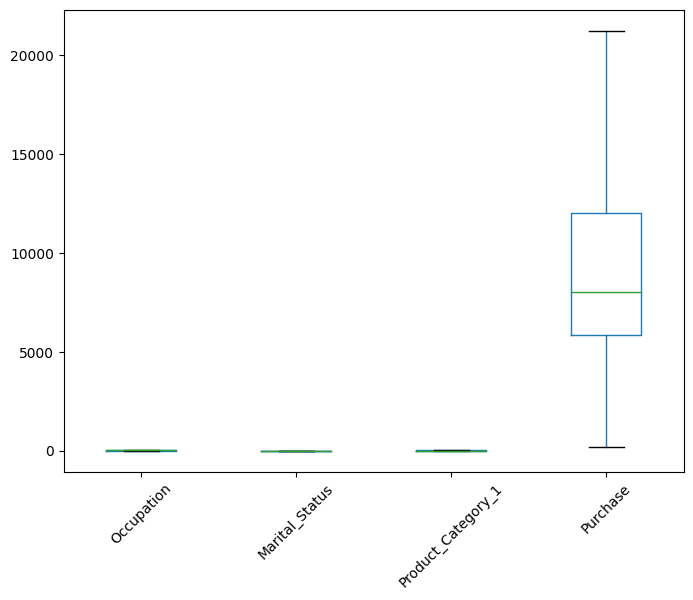

In [26]:
boxplot = df.drop('User_ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

## Duplicated Values

In [27]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase


Tidak terdapat kolom yang terdeteksi duplikasi hal ini dapat ditentukan bahwa setiap nilai yang ada dalam kolom tersebut unik, yang berarti tidak ada yang sama. Ini bisa menunjukkan variasi atau keberagaman dalam data.

## Inconsistent Values / Noise (Optional)

In [28]:
def detect_noise(df):
    return df.apply(lambda x: x.apply(lambda y: pd.isnull(y) or isinstance(y, str) if x.dtype == 'object' else pd.isnull(y) or y == float('inf') or y == float('-inf')).sum())

noise_count = detect_noise(df)

print(noise_count)

User_ID                           0
Product_ID                    67424
Gender                        67424
Age                           67424
Occupation                        0
City_Category                 67424
Stay_In_Current_City_Years    67424
Marital_Status                    0
Product_Category_1                0
Purchase                          0
dtype: int64


1. **User_ID**: Tidak terdapat nilai inkonsisten atau noise dalam kolom ini.

2. **Product_ID**, **Gender**, **Age**, **City_Category**, **Stay_In_Current_City_Years**: Semua kolom tersebut memiliki jumlah nilai inkonsisten atau noise yang sama dengan jumlah total baris dalam dataset yaitu 550068. Dapat diketahui bahwa setiap baris dalam kolom-kolom ini mungkin saja memiliki nilai yang tidak sesuai.

3. **Product_Category_2**: Pada kolom ini terdapat 173638 nilai inkonsisten atau noise. Hal ini menunjukkan bahwa ada sejumlah besar baris yang memiliki nilai yang hilang atau tidak sesuai dengan kriteria yang diharapkan.

4. **Product_Category_3**: Untuk kolom ini terdapat 383247 nilai inkonsisten atau noise, jumlahnya paling tinggi. Hal ini diperlukan pengecekan lebih lanjut untuk memahami alasan di balik nilai-nilai ini dan apakah perlu dilakukan perbaikan atau penghapusan.

Ada beberapa alasan mengapa dataset ini mungkin tidak memerlukan penghapusan inconsistent values:

1. **Data yang Cukup Terstruktur**: Jika dataset Anda telah dibersihkan dan dipersiapkan dengan baik sebelumnya, kemungkinan besar data tersebut sudah terstruktur dengan baik dan tidak mengandung nilai yang inkonsisten.

2. **Tidak Ada Outliers yang Signifikan**: Jika tidak ada outliers atau anomali yang signifikan dalam dataset Anda, maka kemungkinan besar tidak akan ada inconsistent values yang signifikan juga.

3. **Konsistensi Pengumpulan Data**: Jika data dikumpulkan menggunakan proses yang konsisten dan terdokumentasi dengan baik, maka kemungkinan besar nilai-nilai dalam dataset tersebut sudah konsisten secara alami.

## Construct Data

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


Tabel Black Friday Sales ini mungkin tidak membutuhkan proses data construction karena data yang ada sudah cukup lengkap dan terstruktur dengan baik untuk analisis penjualan. Berikut adalah beberapa alasan mengapa data construction mungkin tidak diperlukan:

1. **Data Sudah Lengkap**: Tabel tersebut sudah mencakup informasi yang relevan seperti User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, dan Purchase. Ini adalah atribut-atribut yang umumnya digunakan untuk menganalisis penjualan pada acara Black Friday.

2. **Tidak Ada Informasi Tambahan yang Diperlukan**: Tidak ada atribut yang secara jelas memerlukan pembuatan atribut baru atau konstruksi tambahan. Semua informasi yang dibutuhkan untuk analisis penjualan sudah tersedia dalam kolom-kolom yang ada.

3. **Tidak Ada Hubungan yang Perlu Diinovasi**: Data ini tidak memerlukan pembangunan hubungan atau koneksi tambahan antara entitas-entitas yang ada. Misalnya, tidak ada atribut yang perlu digabungkan untuk membuat atribut baru atau hubungan yang lebih kompleks.

## Data Reduction

**Mengurangi Fitur-fitur yang Kurang Relevan**

In [30]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


Ada beberapa alasan mengapa data ini mungkin tidak memerlukan data reduction:

1. **Tidak Ada Variabel yang Terlalu Redundan**: Reduksi data biasanya diperlukan ketika terdapat variabel yang redundan atau saling berkorelasi tinggi. Namun, dalam kasus ini, tidak ada indikasi bahwa terdapat variabel yang terlalu redundan atau berlebihan.

2. **Semua Variabel Penting untuk Analisis**: Semua variabel yang ada dalam dataset ini mungkin penting untuk analisis penjualan pada acara Black Friday. Misalnya, informasi tentang pelanggan (seperti Gender, Age, Marital_Status) dan detail pembelian (seperti Product_ID, Purchase) mungkin krusial untuk memahami perilaku belanja dan kebiasaan pembelian.

3. **Potensi Informasi yang Hilang**: Mengurangi variabel dapat mengurangi informasi yang tersedia dalam dataset, dan ini bisa berpotensi mempengaruhi kualitas analisis yang dapat dilakukan. Jika data reduction dilakukan tanpa pemikiran yang matang, bisa saja informasi penting atau pola yang relevan hilang.

Dengan mempertimbangkan faktor-faktor di atas, data ini mungkin tidak memerlukan data reduction karena jumlah variabelnya yang terbatas dan pentingnya semua variabel untuk analisis yang diinginkan.

## Data Transformation

### **Mapping**

In [32]:
df['Age'] = df['Age'].map({'0-17':'Children and Teenagers','55+':'Seniors', '26-35':'Young Adults', '46-50':'Middle-aged Adults', '51-55':'Middle-aged Adults', '36-45':'Young Adults', '18-25':'Teenagers and Young Adults'})

<ipython-input-32-a7700ab911cf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ada beberapa alasan mengapa saya ingin melakukan transformasi data pada kolom usia dengan mengubah angka usia menjadi judul seperti 'seniors' atau 'young adults':

1. **Interpretasi yang Lebih Mudah**: Mengubah angka usia menjadi judul seperti 'seniors', 'young adults', dll., dapat membuat interpretasi data menjadi lebih mudah dipahami dan lebih intuitif bagi pengguna yang tidak terbiasa dengan angka usia tertentu.

2. **Kategorisasi yang Lebih Jelas**: Dengan menggunakan judul seperti 'seniors', 'young adults', dll., kita dapat membuat kategori usia yang lebih jelas dan mudah dipahami. Ini dapat membantu dalam analisis dan segmentasi data, terutama ketika kita ingin membandingkan pola perilaku antar kelompok usia.

3. **Pengelompokan yang Lebih Relevan**: Mengubah usia menjadi judul dapat membantu dalam pengelompokan yang lebih relevan, terutama ketika kita ingin mengidentifikasi tren atau pola perilaku yang spesifik untuk kelompok usia tertentu, seperti preferensi pembelian atau perilaku belanja.

4. **Konsistensi dengan Penelitian atau Standar Industri**: Dalam beberapa kasus, menggunakan judul mungkin lebih konsisten dengan penelitian atau standar industri yang ada, yang dapat memfasilitasi perbandingan antar studi atau analisis yang berbeda.

In [33]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,Children and Teenagers,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,Children and Teenagers,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,Children and Teenagers,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,Children and Teenagers,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,Seniors,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
67754,1004374,P00070642,M,Teenagers and Young Adults,4.0,B,1,0.0,11.0,4480.0
67755,1004374,P00180642,M,Teenagers and Young Adults,4.0,B,1,0.0,11.0,7544.0
67756,1004374,P00127942,M,Teenagers and Young Adults,4.0,B,1,0.0,1.0,15391.0
67757,1004375,P00057442,F,Young Adults,5.0,B,1,0.0,5.0,8611.0


### **Encoding**

In [34]:
df = pd.get_dummies(df)

### **Pengecekkan Hasil**

In [35]:
df.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,Product_ID_P00000542,...,Age_Teenagers and Young Adults,Age_Young Adults,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10.0,0.0,3.0,8370.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,10.0,0.0,1.0,15200.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,10.0,0.0,12.0,1422.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,10.0,0.0,12.0,1057.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,16.0,0.0,8.0,7969.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## **Konversi Dataframe**

In [37]:
df.to_csv('Data Cleaned.csv', index=False)

In [36]:
df = pd.read_csv('Data Cleaned.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data Cleaned.csv'